In [23]:
from pyspark.sql import SparkSession
import time
import os
import matplotlib.pyplot as plt

In [24]:
# Create a SparkSession instance (an entry point to all Spark functions)
spark = SparkSession.builder.appName("MYAPP").getOrCreate()

25/04/15 04:20:19 INFO SparkEnv: Registering MapOutputTracker
25/04/15 04:20:19 INFO SparkEnv: Registering BlockManagerMaster
25/04/15 04:20:19 INFO SparkEnv: Registering BlockManagerMasterHeartbeat
25/04/15 04:20:19 INFO SparkEnv: Registering OutputCommitCoordinator


In [25]:
# File paths and sizes
files = [
    ("data_1KB_varied.csv", 1),
    ("data_10KB_varied.csv", 10),
    ("data_100KB_varied.csv", 100),
    ("data_1MB_varied.csv", 1024),
    ("data_5MB_varied.csv", 5120),
]

files.reverse()

times = []

for file_name, size_kb in files:
    path = os.path.join("gs://dataproc-staging-us-central1-1022936215757-ezcuz3ds/data", file_name)  # CHANGE this path accordingly

    print(f"\nProcessing {file_name}...")

    spark.catalog.clearCache()  # Clear any previous cache
    # Read CSV
    df = spark.read.csv(path, header=True, inferSchema=True)
    
    # Start timer
    start_time = time.time()

    # Perform transformation
    df.groupBy("Category").avg("Value").show()

    # End timer
    end_time = time.time()
    elapsed = end_time - start_time
    times.append((size_kb, elapsed))
    print(f"Time taken: {elapsed:.4f} seconds")

# Stop Spark
spark.stop()


Processing data_5MB_varied.csv...


+--------+------------------+
|Category|        avg(Value)|
+--------+------------------+
|       D| 5068.749797242498|
|       B|5051.5136670547145|
|       C| 5051.364294463114|
|       A| 5042.691065189804|
+--------+------------------+

Time taken: 1.9278 seconds

Processing data_1MB_varied.csv...


+--------+-----------------+
|Category|       avg(Value)|
+--------+-----------------+
|       D|5041.594258301477|
|       B|5081.064300218094|
|       C|5030.068785471056|
|       A|5022.023852250635|
+--------+-----------------+

Time taken: 0.8230 seconds

Processing data_100KB_varied.csv...
+--------+-----------------+
|Category|       avg(Value)|
+--------+-----------------+
|       D|5031.329646017699|
|       B|4975.851462865717|
|       C|5098.554016620498|
|       A|5123.229104477612|
+--------+-----------------+

Time taken: 0.4626 seconds

Processing data_10KB_varied.csv...
+--------+------------------+
|Category|        avg(Value)|
+--------+------------------+
|       D| 5210.731884057971|
|       B|4987.7733333333335|
|       C| 5328.714285714285|
|       A| 5434.089552238806|
+--------+------------------+

Time taken: 0.4678 seconds

Processing data_1KB_varied.csv...
+--------+-----------------+
|Category|       avg(Value)|
+--------+-----------------+
|       D|       

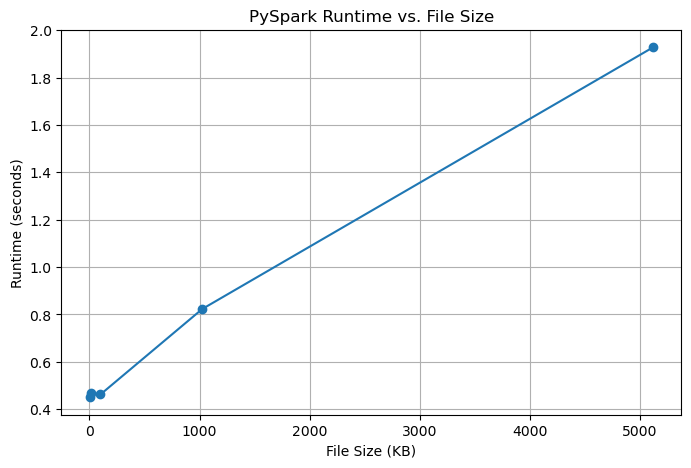

In [26]:
# Plot results
sizes, durations = zip(*times)
plt.figure(figsize=(8, 5))
plt.plot(sizes, durations, marker='o')
plt.title("PySpark Runtime vs. File Size")
plt.xlabel("File Size (KB)")
plt.ylabel("Runtime (seconds)")
plt.grid(True)
plt.savefig("pyspark_runtime_plot.png")
plt.show()


In [27]:
#spark.stop()